In [ ]:
# Pandas for dataframe and data manipulation
import pandas as pd
import numpy as np

# Matplotlib for plotting/visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# For data preprocessing
from sklearn import preprocessing
label = preprocessing.LabelEncoder()    # for encoding text data

# For data scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# For splitting data into training and testing sets
# For model performance evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# load the dataset
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Dataset/second_dataset_82_Label_2A.xlsx")

In [ ]:
df.head(5)

,Samples,Gender,Age_Group,ABCC6,ACBD5,AFG3L2,AIPL1,ALMS1,APOD,APOE,...,SDCCAG8,TIMP3,TSPAN12,TTC8,TUBGCP4,TUBGCP6,USH2A,VEGFA,WDPCP,Class
0,1_50:60_F,Female,50-60,64.6,253.0,92.0,151.0,114.0,104.2,95.6,...,192.0,156.4,163.2,220.0,182.0,124.0,275.0,73.0,165.0,Latent
1,2_50:60_F,Female,50-60,76.0,239.0,76.8,150.0,120.0,104.2,86.0,...,203.0,159.0,145.0,228.4,200.0,113.0,251.0,67.0,159.0,Latent
2,3_40:50_F,Female,40-50,55.0,257.0,79.8,144.0,131.0,117.0,97.8,...,198.0,159.0,174.0,231.0,188.0,136.0,255.0,72.0,162.0,Latent
3,4_40:50_F,Female,40-50,70.0,228.0,72.0,145.0,140.0,104.0,96.0,...,183.0,164.2,153.4,236.4,188.0,119.0,260.4,71.0,184.0,Latent
4,5_50:60_F,Female,50-60,74.2,250.8,67.0,161.6,113.0,92.0,95.2,...,194.8,160.0,172.0,226.6,196.0,117.0,257.0,68.0,170.0,Latent


In [ ]:
df.tail()

,Samples,Gender,Age_Group,ABCC6,ACBD5,AFG3L2,AIPL1,ALMS1,APOD,APOE,...,SDCCAG8,TIMP3,TSPAN12,TTC8,TUBGCP4,TUBGCP6,USH2A,VEGFA,WDPCP,Class
495,235_50:60_M,Male,50-60,79.6,241.0,78.6,147.0,121.6,83.4,78.0,...,191.0,180.2,165.0,243.0,201.6,118.0,258.2,87.0,174.0,Latent
496,236_40:50_M,Male,40-50,78.0,247.4,72.0,153.2,124.6,75.0,85.0,...,175.8,186.0,171.4,241.0,201.0,112.0,256.0,88.4,166.0,Active
497,237_50:60_M,Male,50-60,79.4,260.0,87.6,139.0,125.8,89.0,81.0,...,170.0,174.0,190.0,229.4,197.8,131.0,256.0,96.0,162.0,Active
498,238_40:50_M,Male,40-50,74.6,240.0,80.0,136.0,142.0,88.0,88.4,...,189.0,182.0,172.0,238.0,198.4,104.0,259.0,78.0,181.0,Active
499,239_50:60_M,Male,50-60,67.0,238.0,94.0,145.0,122.0,87.8,81.0,...,181.0,185.0,170.0,251.0,199.6,108.0,250.8,81.0,165.0,Active


In [ ]:
print(df.shape)   # dataset rows & columns
df.columns        # columns of the dataset

(500, 86)


Index(['Samples', 'Gender', 'Age_Group', 'ABCC6', 'ACBD5', 'AFG3L2', 'AIPL1',
       'ALMS1', 'APOD', 'APOE', 'ARL2BP', 'ARL6', 'ARMS2', 'ARSG', 'BBS10',
       'BBS2', 'BEST1', 'C2', 'C3', 'C8orf37', 'CABP4', 'CACNA1F', 'CAPN5',
       'CC2D2A', 'CFB', 'CFD', 'CFHR1', 'CHM', 'CLCC1', 'CLN3', 'CLRN1',
       'CLUAP1', 'CNGB3', 'CNNM4', 'COX2', 'CYSLT1R', 'ESPN', 'GRK1', 'GUCY2D',
       'HGSNAT', 'HMCN1', 'IFT27', 'IMPG1', 'ITM2B', 'KLHL7', 'LCA5', 'LRAT',
       'LRP5', 'LTB4R', 'LTE4', 'LZTFL1', 'MYO7A', 'NDP', 'NEK2', 'NPHP1',
       'NR2E3', 'NRL', 'PCARE', 'PCDH15', 'PDE6B', 'PDE6C', 'PDZD7', 'PEX7',
       'POC1B', 'PRDM13', 'PROM1', 'PRPF4', 'RB1', 'RDH5', 'REEP6', 'RGR',
       'RGS9BP', 'RLBP1', 'RP1L1', 'RPGR', 'SAG', 'SDCCAG8', 'TIMP3',
       'TSPAN12', 'TTC8', 'TUBGCP4', 'TUBGCP6', 'USH2A', 'VEGFA', 'WDPCP',
       'Class'],
      dtype='object')

In [ ]:
# looking for duplicate values
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 86 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Samples    500 non-null    object 
 1   Gender     500 non-null    object 
 2   Age_Group  500 non-null    object 
 3   ABCC6      500 non-null    float64
 4   ACBD5      500 non-null    float64
 5   AFG3L2     500 non-null    float64
 6   AIPL1      500 non-null    float64
 7   ALMS1      500 non-null    float64
 8   APOD       500 non-null    float64
 9   APOE       500 non-null    float64
 10  ARL2BP     500 non-null    float64
 11  ARL6       500 non-null    float64
 12  ARMS2      500 non-null    float64
 13  ARSG       500 non-null    float64
 14  BBS10      500 non-null    float64
 15  BBS2       500 non-null    float64
 16  BEST1      500 non-null    float64
 17  C2         500 non-null    float64
 18  C3         500 non-null    float64
 19  C8orf37    500 non-null    float64
 20  CABP4     

In [ ]:
df.describe().T       # columns statistical analysis

,count,mean,std,min,25%,50%,75%,max
ABCC6,500.0,73.0436,8.142948,53.0,67.00,72.8,78.4,93.0
ACBD5,500.0,244.5780,7.159824,228.0,240.55,244.8,249.0,261.0
AFG3L2,500.0,81.7380,7.714905,65.0,76.00,81.7,87.0,99.0
AIPL1,500.0,152.7404,9.305549,133.0,145.60,153.0,159.2,172.0
ALMS1,500.0,127.2232,7.399557,112.0,122.00,127.2,132.4,142.0
...,...,...,...,...,...,...,...,...
TUBGCP4,500.0,194.8428,8.834212,176.0,188.00,195.0,201.6,213.0
TUBGCP6,500.0,123.4980,8.535715,104.0,117.00,123.7,129.6,142.0
USH2A,500.0,259.8312,8.760486,242.0,253.00,259.2,267.0,279.0
VEGFA,500.0,81.0864,10.932237,58.0,73.90,81.0,88.0,106.0


In [ ]:
df.value_counts('Class')

,count
Class,
Active,262
Latent,238


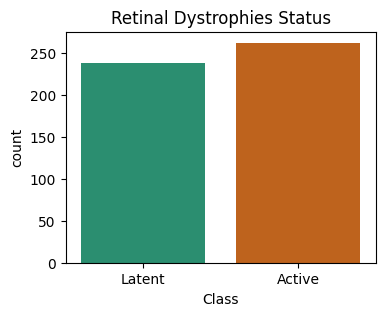

In [ ]:
# Count plot for target column
plt.figure(figsize=(4, 3))
sns.countplot(x='Class', data=df, palette='Dark2')
plt.title('Retinal Dystrophies Status')

# plt.savefig('class_count.png', dpi=300, bbox_inches='tight')
plt.show()


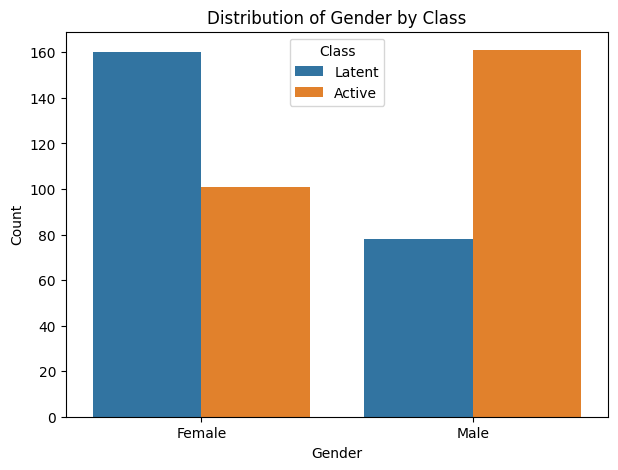

In [ ]:
# Plotting the distribution of Gender
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Gender', hue='Class')
plt.title('Distribution of Gender by Class')
plt.xlabel('Gender')
plt.ylabel('Count')
# plt.savefig('gender_dist.png', dpi=300, bbox_inches='tight')
plt.show()


<Figure size 700x700 with 0 Axes>

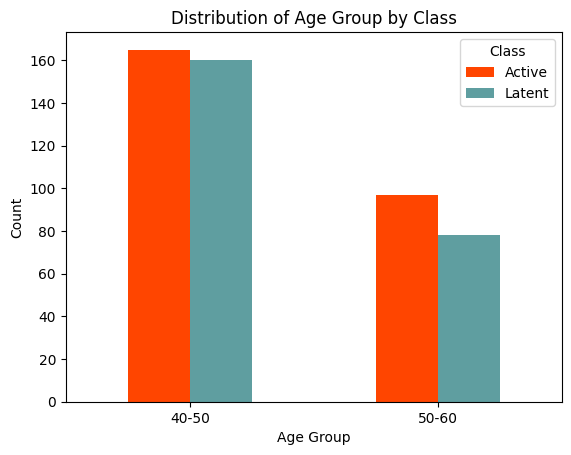

In [ ]:
# age group and class

age_class_counts = pd.crosstab(df['Age_Group'], df['Class'])
plt.figure(figsize=(7, 7))
age_class_counts.plot(kind='bar', color=['orangered', 'cadetblue', 'salmon'])
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Age Group by Class')
plt.legend(title='Class', labels=['Active', 'Latent'])
plt.xticks(rotation = 0)
plt.savefig('age_dist.png', dpi=300, bbox_inches='tight')
plt.show()

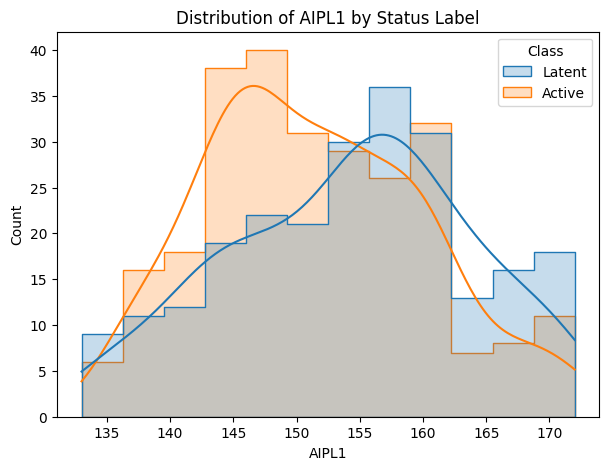

In [ ]:
# Distribution plot for 'AIPL1'
plt.figure(figsize=(7, 5))
sns.histplot(data=df, x='AIPL1', hue='Class', kde=True, element="step")
plt.title('Distribution of AIPL1 by Status Label')
plt.show()

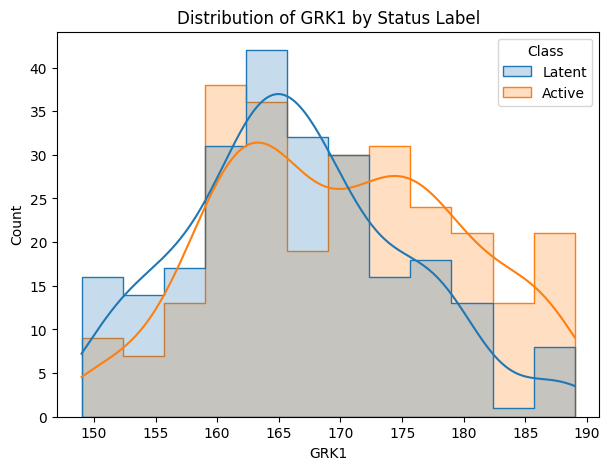

In [ ]:
# Distribution plot for 'GRK1'
plt.figure(figsize=(7, 5))
sns.histplot(data=df, x='GRK1', hue='Class', kde=True, element="step")
plt.title('Distribution of GRK1 by Status Label')
plt.show()

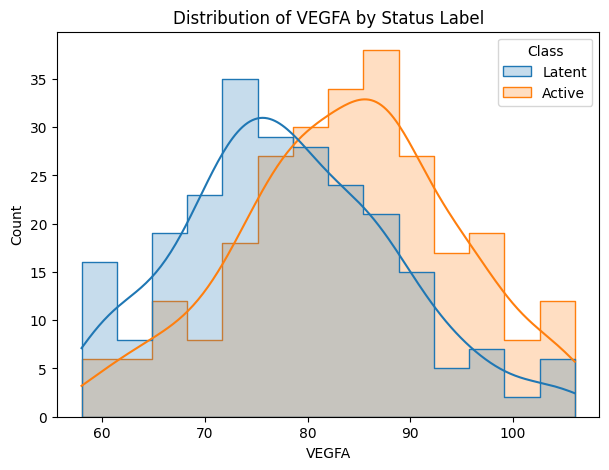

In [ ]:
# Distribution plot for 'VEGFA'
plt.figure(figsize=(7, 5))
sns.histplot(data=df, x='VEGFA', hue='Class', kde=True, element="step")
plt.title('Distribution of VEGFA by Status Label')
plt.show()

In [ ]:
# find the columns with outliers value
numerical_columns = df.select_dtypes(include=[np.number])

columns_with_outliers = []

for column in numerical_columns.columns:
    # Z-scores for the current column
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())

    # define a threshold
    threshold = 5

    if any(z_scores > threshold):
        columns_with_outliers.append(column)

print("Columns with outliers:", columns_with_outliers)

Columns with outliers: []


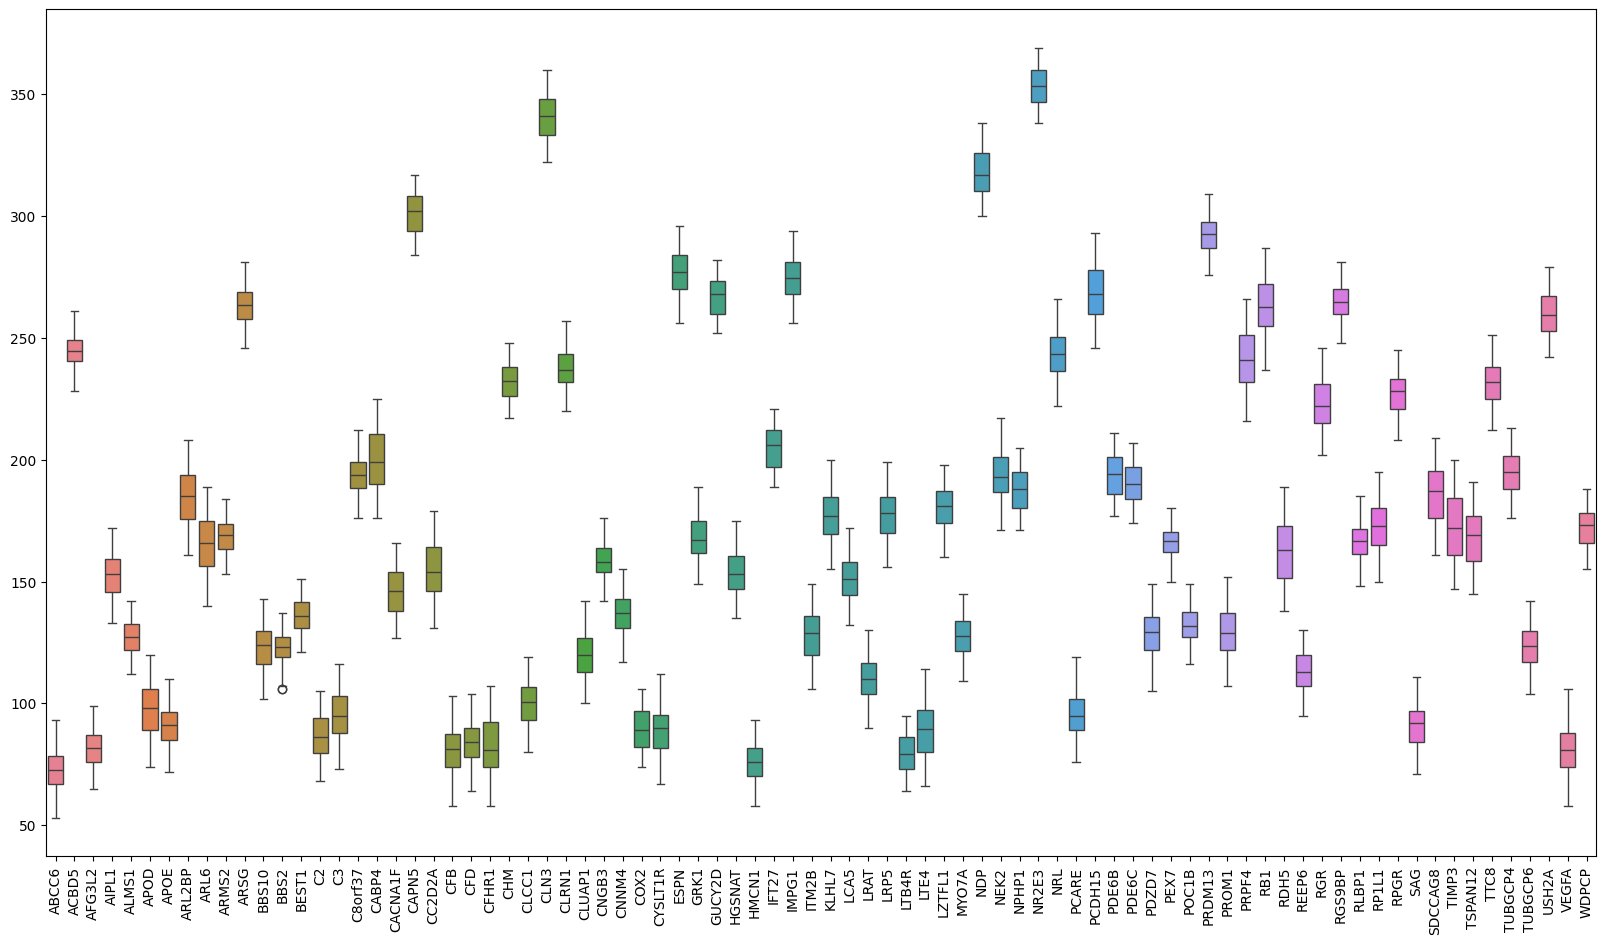

In [ ]:
# outliers visualize

plt.figure(figsize=(20, 11))
sns.boxplot(data = df, orient='v')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_1 = df.copy()

In [ ]:
df_1 = df_1.drop(columns=['Samples'])     # removing the Samples id column

In [ ]:
df_1['Gender'] = label.fit_transform(df_1['Gender'])    #transfrom the strings in numeric values
df_1['Gender'].unique()

df_1['Age_Group'] = label.fit_transform(df_1['Age_Group'])
df_1['Age_Group'].unique()


array([1, 0])

In [ ]:
# Define the mapping
label_mapping = {
    'Active': 1,
    'Latent': 0
}

# Apply the mapping to the 'Class' column
df_1['Class'] = df_1['Class'].map(label_mapping)

# Verify the changes
print(df_1['Class'].value_counts())

Class
1    262
0    238
Name: count, dtype: int64


In [ ]:
df_1

,Gender,Age_Group,ABCC6,ACBD5,AFG3L2,AIPL1,ALMS1,APOD,APOE,ARL2BP,...,SDCCAG8,TIMP3,TSPAN12,TTC8,TUBGCP4,TUBGCP6,USH2A,VEGFA,WDPCP,Class
0,0,1,64.6,253.0,92.0,151.0,114.0,104.2,95.6,183.0,...,192.0,156.4,163.2,220.0,182.0,124.0,275.0,73.0,165.0,0
1,0,1,76.0,239.0,76.8,150.0,120.0,104.2,86.0,204.0,...,203.0,159.0,145.0,228.4,200.0,113.0,251.0,67.0,159.0,0
2,0,0,55.0,257.0,79.8,144.0,131.0,117.0,97.8,197.0,...,198.0,159.0,174.0,231.0,188.0,136.0,255.0,72.0,162.0,0
3,0,0,70.0,228.0,72.0,145.0,140.0,104.0,96.0,178.0,...,183.0,164.2,153.4,236.4,188.0,119.0,260.4,71.0,184.0,0
4,0,1,74.2,250.8,67.0,161.6,113.0,92.0,95.2,187.0,...,194.8,160.0,172.0,226.6,196.0,117.0,257.0,68.0,170.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,1,79.6,241.0,78.6,147.0,121.6,83.4,78.0,191.0,...,191.0,180.2,165.0,243.0,201.6,118.0,258.2,87.0,174.0,0
496,1,0,78.0,247.4,72.0,153.2,124.6,75.0,85.0,189.0,...,175.8,186.0,171.4,241.0,201.0,112.0,256.0,88.4,166.0,1
497,1,1,79.4,260.0,87.6,139.0,125.8,89.0,81.0,172.0,...,170.0,174.0,190.0,229.4,197.8,131.0,256.0,96.0,162.0,1
498,1,0,74.6,240.0,80.0,136.0,142.0,88.0,88.4,167.2,...,189.0,182.0,172.0,238.0,198.4,104.0,259.0,78.0,181.0,1


In [ ]:
df_1.corr()

,Gender,Age_Group,ABCC6,ACBD5,AFG3L2,AIPL1,ALMS1,APOD,APOE,ARL2BP,...,SDCCAG8,TIMP3,TSPAN12,TTC8,TUBGCP4,TUBGCP6,USH2A,VEGFA,WDPCP,Class
Gender,1.000000,0.053304,0.509999,0.101911,0.291552,-0.549122,-0.049368,-0.779350,-0.484366,-0.717239,...,-0.797323,0.846440,0.762682,0.531825,0.417280,-0.472746,-0.312679,0.708789,-0.298620,0.286720
Age_Group,0.053304,1.000000,0.007098,0.020665,0.058350,-0.042386,-0.028850,-0.049985,-0.060502,-0.030188,...,-0.030437,0.058280,0.040726,0.057456,0.017537,-0.084849,0.007829,0.022683,0.000051,0.044499
ABCC6,0.509999,0.007098,1.000000,-0.006913,0.201009,-0.247179,0.009502,-0.399656,-0.203980,-0.317558,...,-0.401094,0.466175,0.401942,0.291225,0.184417,-0.275209,-0.240994,0.387776,-0.173950,0.142258
ACBD5,0.101911,0.020665,-0.006913,1.000000,0.069659,-0.006328,0.043451,-0.056869,-0.087388,-0.135296,...,-0.049694,0.104775,0.084618,-0.007655,-0.029053,-0.035775,-0.011739,0.137327,-0.036109,0.171079
AFG3L2,0.291552,0.058350,0.201009,0.069659,1.000000,-0.139195,-0.035086,-0.230001,-0.128262,-0.230605,...,-0.252402,0.211168,0.226153,0.180567,0.065289,-0.083996,-0.017654,0.216152,-0.089541,0.062790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TUBGCP6,-0.472746,-0.084849,-0.275209,-0.035775,-0.083996,0.266525,0.035828,0.414145,0.241690,0.307103,...,0.378052,-0.405126,-0.311856,-0.215724,-0.211624,1.000000,0.118999,-0.306386,0.077858,-0.133129
USH2A,-0.312679,0.007829,-0.240994,-0.011739,-0.017654,0.164313,0.006964,0.226301,0.128686,0.183344,...,0.234647,-0.267257,-0.243467,-0.213216,-0.149259,0.118999,1.000000,-0.226347,0.098308,-0.072835
VEGFA,0.708789,0.022683,0.387776,0.137327,0.216152,-0.386823,-0.029454,-0.552849,-0.277941,-0.520422,...,-0.581857,0.631375,0.546892,0.373535,0.238338,-0.306386,-0.226347,1.000000,-0.216504,0.268616
WDPCP,-0.298620,0.000051,-0.173950,-0.036109,-0.089541,0.201605,0.136201,0.231142,0.174856,0.209889,...,0.283529,-0.246622,-0.246372,-0.202734,-0.229400,0.077858,0.098308,-0.216504,1.000000,-0.020447


In [ ]:
plt.figure(figsize=(35,15))
sns.heatmap(df_1.corr(), annot=True, cmap='coolwarm')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
X = df_1.drop('Class', axis=1)     # droping the target column
y = df_1['Class']                  # & put the target column in a variable y


In [ ]:
## feature scaling using Standard Scaler/MinMaxScaler

m_saler = MinMaxScaler()
m_saler.fit(X)
scaled_x = m_saler.transform(X)

In [ ]:
# split the dataset into training (80%) and testing (20%) set
X_train, X_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.2, random_state=0)

In [ ]:
# Support Vector Machine
from sklearn.svm import SVC

# Create an SVM classifier
svm_clf = SVC(kernel='linear', random_state=0)  # Using linear kernel, can be changed as needed

# Train the SVM classifier
svm_model = svm_clf.fit(X_train, y_train)

# Make predictions on the test set
svm_pred = svm_model.predict(X_test)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, svm_pred) * 100
svm_accuracy = "{:.2f}".format(svm_accuracy)
print("Accuracy of SVM:", svm_accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, svm_pred))


Accuracy of SVM: 69.00
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.62      0.64        45
           1       0.71      0.75      0.73        55

    accuracy                           0.69       100
   macro avg       0.69      0.68      0.68       100
weighted avg       0.69      0.69      0.69       100



In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rf_m = rfc.fit(X_train, y_train)
rf_pred = rf_m.predict(X_test)
rf_as = accuracy_score(y_test, rf_pred) * 100
rf_as = "{:.2f}".format(rf_as)
print("Accuracy of RF:", rf_as)

print("Classification Report:")
print(classification_report(y_test, rf_pred))

Accuracy of RF: 64.00
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.64      0.62        45
           1       0.69      0.64      0.66        55

    accuracy                           0.64       100
   macro avg       0.64      0.64      0.64       100
weighted avg       0.64      0.64      0.64       100



In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lgc = LogisticRegression()
lg_m = lgc.fit(X_train, y_train)
lg_pred = lg_m.predict(X_test)
lgc_as = accuracy_score(y_test, lg_pred) * 100
lgc_as = "{:.2f}".format(lgc_as)
print('Accuracy of LG:', lgc_as)

print("Classification Report:")
print(classification_report(y_test, lg_pred))

Accuracy of LG: 72.00
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.64      0.67        45
           1       0.73      0.78      0.75        55

    accuracy                           0.72       100
   macro avg       0.72      0.71      0.71       100
weighted avg       0.72      0.72      0.72       100



In [ ]:
# XGBoost
from xgboost import XGBClassifier
xgc = XGBClassifier()
xgc_m = xgc.fit(X_train, y_train)
xgc_pred = xgc_m.predict(X_test)
xg_as = accuracy_score(y_test, xgc_pred) * 100
xg_as = "{:.2f}".format(xg_as)
print("Accuracy of XGBoost:", xg_as)

print("Classification Report: ")
print(classification_report(y_test, xgc_pred))

Accuracy of XGBoost: 70.00
Classification Report: 
              precision    recall  f1-score   support

           0       0.70      0.58      0.63        45
           1       0.70      0.80      0.75        55

    accuracy                           0.70       100
   macro avg       0.70      0.69      0.69       100
weighted avg       0.70      0.70      0.70       100



In [ ]:
from sklearn.ensemble import VotingClassifier
two_cla = VotingClassifier(estimators=[('RF', rfc), ('LGR', lgc)], voting='soft')
two_cla.fit(X_train, y_train)
pred = two_cla.predict(X_test)
print('Accuracy: %.2f' % (accuracy_score(y_test, pred) * 100))
print(classification_report(y_test, pred))

Accuracy: 70.00
              precision    recall  f1-score   support

           0       0.68      0.62      0.65        45
           1       0.71      0.76      0.74        55

    accuracy                           0.70       100
   macro avg       0.70      0.69      0.69       100
weighted avg       0.70      0.70      0.70       100



In [ ]:
from sklearn.ensemble import VotingClassifier
two_cla_1 = VotingClassifier(estimators=[('LGR', lgc), ('XGB', xgc)], voting='soft')
two_cla_1.fit(X_train, y_train)
pred_1 = two_cla_1.predict(X_test)
print('Accuracy: %.2f' % (accuracy_score(y_test, pred_1) * 100))
print(classification_report(y_test, pred_1))

Accuracy: 71.00
              precision    recall  f1-score   support

           0       0.70      0.62      0.66        45
           1       0.72      0.78      0.75        55

    accuracy                           0.71       100
   macro avg       0.71      0.70      0.70       100
weighted avg       0.71      0.71      0.71       100



Confusion matrix of LR


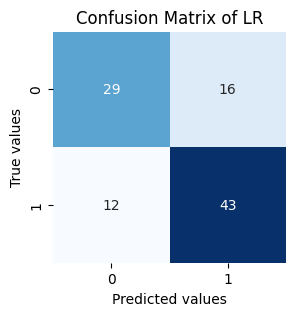

In [ ]:
print('Confusion matrix of LR')

cm = confusion_matrix(y_test, lg_pred)
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.title("Confusion Matrix of LR")
# plt.savefig('cm.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
from sklearn.inspection import permutation_importance

feature_names = df_1.columns[:-1]

X_test_df = pd.DataFrame(X_test, columns=feature_names)

result = permutation_importance(lgc, X_test_df, y_test, n_repeats=10, random_state=0)

perm_importance_df = pd.DataFrame({
    'Feature': X_test_df.columns,
    'Importance': result.importances_mean
})


# Calculate importance as percentage
total_importance = perm_importance_df['Importance'].sum()
perm_importance_df['Importance (%)'] = (perm_importance_df['Importance'] / total_importance) * 100

# Sort the features by importance
perm_importance_df = perm_importance_df.sort_values(by='Importance (%)', ascending=False)


# Display the top 15 features
top_15_features = perm_importance_df.head(15)
print(top_15_features)
# print(top_15_features[['Feature', 'Importance (%)']])

   Feature  Importance  Importance (%)
17      C3       0.066       13.441955
8     APOE       0.054       10.997963
7     APOD       0.046        9.368635
63  PRDM13       0.044        8.961303
59   PDE6C       0.036        7.331976
61    PEX7       0.035        7.128310
16      C2       0.034        6.924644
43   KLHL7       0.022        4.480652
53   NPHP1       0.021        4.276986
3    ACBD5       0.020        4.073320
35    ESPN       0.018        3.665988
44    LCA5       0.015        3.054990
6    ALMS1       0.014        2.851324
27   CLCC1       0.013        2.647658
66     RB1       0.013        2.647658


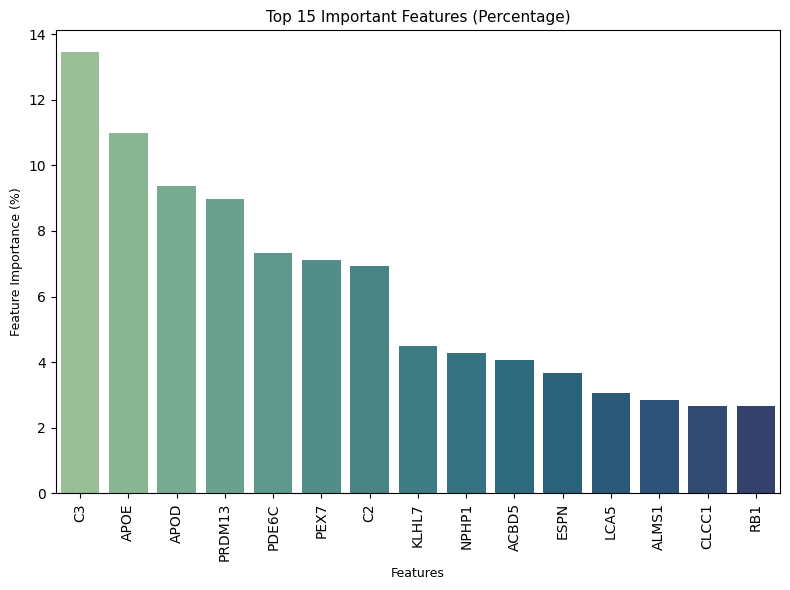

In [ ]:
# Visualize the top 15 features as percentages
plt.figure(figsize=(8, 6))
sns.barplot(x='Feature', y='Importance (%)', data=top_15_features, palette='crest')

# Customize the plot
plt.title('Top 15 Important Features (Percentage)', fontsize=11)
plt.xlabel('Features', fontsize=9)
plt.ylabel('Feature Importance (%)', fontsize=9)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust the layout and display the plot
plt.tight_layout()
# plt.savefig('feature_imp.png', dpi=300, bbox_inches='tight')
plt.show()